In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LogisticRegression
import random
import seaborn as sns

%matplotlib inline

In [2]:
def get_logreg_model(X, y):
    clf = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000).fit(X, y)
    return -1*clf.coef_.flatten()

In [3]:
imgs = pickle.load(open("tcavs/images.pickle", "rb"))
concepts = pickle.load(open("tcavs/google_concepts.pickle", "rb"))
base = pickle.load(open("tcavs/concepts.pickle", "rb"))

In [4]:
base.keys()

dict_keys(['talking_to_passenger', 'talking_on_the_phone_left', 'hair_makeup', 'texting_right', 'talking_on_the_phone_right', 'operating_the_radio', 'drinking', 'texting_left', 'reaching_behind', 'safe_driving'])

In [5]:
def compute_direc_derivative(x, y):
    a = np.dot(x, y)
    return a < 0

In [22]:
distractions = list(concepts.keys())
print(distractions)

['talking_to_passenger', 'hair_makeup', 'talking_on_the_phone_right', 'operating_the_radio', 'drinking', 'texting_left', 'reaching_behind']


In [8]:
dict_of_X = {}
dict_of_y = {}
for distraction in distractions:
        for concept_fts in concepts[distraction]:
            if distraction not in dict_of_X.keys():
                dict_of_X[distraction] = []
                dict_of_y[distraction] = []
                dict_of_X[distraction].append(concept_fts)
                #f distraction == "safe_driving":
#                 dict_of_y[distraction].append(np.zeros_like(concept_fts.shape))
                dict_of_y[distraction].append(np.ones_like(concept_fts.shape))
            else:
                dict_of_X[distraction].append(concept_fts)
                #if distraction == "safe_driving":
#                 dict_of_y[distraction].append(np.zeros_like(concept_fts.shape))
                dict_of_y[distraction].append(np.ones_like(concept_fts.shape))

In [9]:
base_dist = "safe_driving"
dict_of_X["safe_driving"] = []
dict_of_y["safe_driving"] = []
for base_fts in base["safe_driving"]:
        dict_of_X["safe_driving"].append(base_fts)
        #f distraction == "safe_driving":
        dict_of_y[base_dist].append(np.zeros_like(base_fts.shape))
        #else: dict_of_y[distraction].append(np.ones_like(concept_fts.shape))
#     else:
#         dict_of_X["safe_driving"].append(base_fts)
#         #if distraction == "safe_driving":
#         dict_of_y["safe_driving"].append(np.zeros_like(base_fts.shape))
#         #else: dict_of_y[distraction].append(np.ones_like(concept_fts.shape))

In [10]:
base_X = dict_of_X["safe_driving"]
base_y = dict_of_y["safe_driving"]

In [37]:
# first concept - talking_to_passenger
# do this for all
X_unshuff = base_X + dict_of_X["operating_the_radio"]
y_unshuff = base_y + dict_of_y["operating_the_radio"]

c = list(zip(X_unshuff, y_unshuff))

X, y = zip(*c)

In [38]:
wts = get_logreg_model(X, y)

/Users/Janjua/opt/anaconda3/envs/rl/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
for distraction in distractions:
    count = 0
    img_counter = 0
    if distraction != "safe_driving":
        for img_fts in imgs[distraction]:
            img_counter += 1
            dydx = compute_direc_derivative(img_fts, wts)
            if dydx: 
                count += 1

        print(f"{distraction} - TCAV Score {count/img_counter}")

talking_to_passenger - TCAV Score 0.3333333333333333
hair_makeup - TCAV Score 0.13333333333333333
talking_on_the_phone_right - TCAV Score 0.23333333333333334
operating_the_radio - TCAV Score 0.5666666666666667
drinking - TCAV Score 0.23333333333333334
texting_left - TCAV Score 0.2
reaching_behind - TCAV Score 0.2


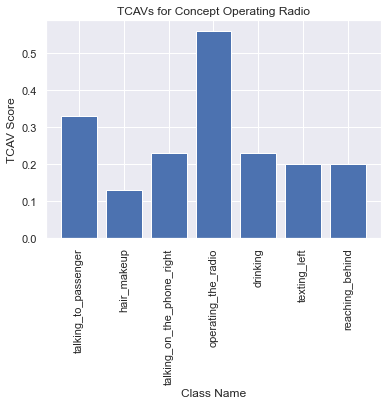

In [59]:
plt.rcParams['text.usetex'] = False
tcavs = [0.33, 0.13, 0.23, 0.56, 0.23, 0.2, 0.2]
bars = [x for x in range(len(tcavs))]
plt.bar(bars, tcavs)
plt.xticks(bars, distractions, rotation='90')
plt.xlabel("Class Name")
plt.ylabel("TCAV Score")
plt.title("TCAVs for Concept Operating Radio")
sns.set(rc={'text.usetex': False})
plt.savefig("")
plt.show()